In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.9121265377855887

In [8]:
(337+182)/(337+182+20+30)

0.9121265377855887

* 정밀도

In [9]:
from sklearn.metrics import  precision_score

precision_score(y,y_pred)

0.900990099009901

In [15]:
182/(182+20) # TP/(TP+FP) ; 예측을 positive로 한 것 중 진짜 positive (양성예측도)

0.900990099009901

* 재현율

In [10]:
from sklearn.metrics import recall_score

recall_score(y,y_pred)

0.8584905660377359

In [17]:
182/(182+30) #TP/(FN+TP); 실제 positive 중 예측도 positive로 한 것

0.8584905660377359

* F1 score

In [11]:
from sklearn.metrics import f1_score

f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [6]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred = model_lor.predict(X)

custom_threshold = 0.1

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

In [7]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion= confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 =f1_score(y_test,pred) # F1스코어 추가 
    print("오차행렬")
    print(confusion)
    print("정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},F1:{3:.4f}".
         format(accuracy,precision, recall, f1))

In [8]:
get_clf_eval(y,y_pred2)

오차행렬
[[267  90]
 [  6 206]]
정확도:0.8313,정밀도:0.6959,재현율:0.9717,F1:0.8110


# 문제외 추가코드

In [38]:
y_pred10=[]
for i in pred_proba_1:
    if i > 0.1:
        y_pred10.append(1)
    else:
        y_pred10.append(0)

In [44]:
y_pred2.reshape(-1).tolist().count(1)

296

In [45]:
y_pred10.count(1)

296

In [23]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred = model_lor.predict(X)

custom_threshold = 0.9

pred_proba_3 = pred_proba[:,0].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_3)
y_pred4 = binarizer.transform(pred_proba_3)

In [24]:
get_clf_eval(y,y_pred4)

오차행렬
[[ 90 267]
 [206   6]]
정확도:0.1687,정밀도:0.0220,재현율:0.0283,F1:0.0247


In [31]:
y_pred4

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [32]:
y_pred2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

--------------------------------------------------------------------------------------------

* ROC 곡선 시각화

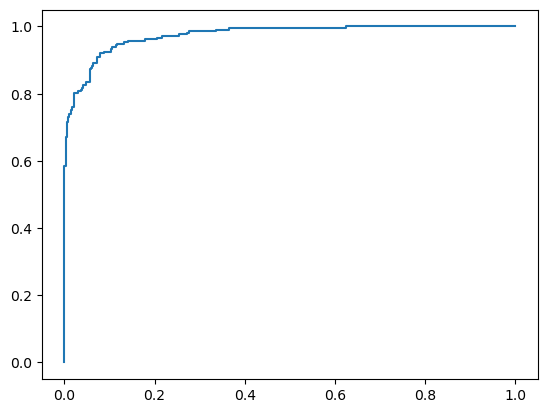

In [22]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="ROC")

* ROC AUC 값

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y,y_pred)

0.9012340785370753

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y,y_pred2)

0.8597986364357064